In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [96]:
cleaned=pd.read_csv('2014_cleaned.csv')

In [67]:
for i in cleaned.columns:
    if not i.startswith('bach'):
        print(i)

id
name
city
state
zip
region_id
ownership
online_only
open_admissions_policy
1_yr_repay.overall_rate
6_yrs_AE.WNE.mean_earnings
tuition.in_state
tuition.out_of_state
tuition_revenue_per_fte
instructional_expenditure_per_fte
faculty_salary
pell_grant_rate
compl_rate_4yr_150nt
share_first.time_full.time
retention_rate.four_year.full_time
3_yr_default_rate
t_iv.withdrawn_by.3yrs
median_debt.overall


In [68]:
#how does the tuition differ between regions?
cleaned.groupby('region_id')['tuition.out_of_state'].mean()

region_id
1    31291.878665
2    28201.515685
3    25165.573145
4    21348.421468
5    21086.650934
6    19660.662373
7    19462.348169
8    26127.426527
9     5843.878788
Name: tuition.out_of_state, dtype: float64

,name,instructional_expenditure_per_fte
1802,Strayer University-Global Region,640.0
1603,Caribbean University-Carolina,689.0
1639,Caribbean University-Ponce,737.0
983,Excelsior College,813.0
838,Beth Medrash Govoha,823.0
483,Ottawa University-Kansas City,989.0
1640,Caribbean University-Vega Baja,1011.0
1636,Kaplan University-Davenport Campus,1136.0
1721,Colorado Technical University-Online,1148.0
1803,Johnson & Wales University-Online,1381.0


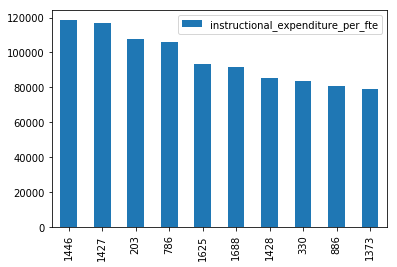

In [69]:
#what schools spend the most on students?
cleaned[['name','instructional_expenditure_per_fte']].sort_values(
    by="instructional_expenditure_per_fte",ascending=False).head(10).plot(kind='bar')
#what schools spend the least?
cleaned[['name','instructional_expenditure_per_fte']].sort_values(
    by="instructional_expenditure_per_fte").head(10)


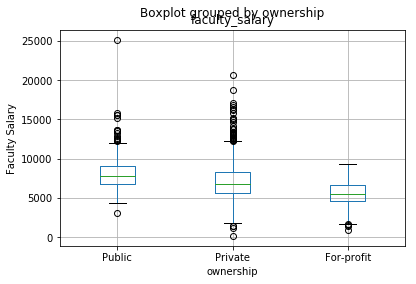

In [95]:
cleaned.boxplot(column='faculty_salary', by='ownership')
plt.xticks(np.arange(start=1,stop=4), ('Public', 'Private', 'For-profit'))
plt.ylabel('Faculty Salary')
plt.show()

On average, publicly-owned colleges pay their faculty more than privately-owned colleges do, while for-profit colleges pay their faculty the least.

In [71]:
cleaned.iloc[:,47:].corr()

,1_yr_repay.overall_rate,6_yrs_AE.WNE.mean_earnings,tuition.in_state,tuition.out_of_state,tuition_revenue_per_fte,instructional_expenditure_per_fte,faculty_salary,pell_grant_rate,compl_rate_4yr_150nt,share_first.time_full.time,retention_rate.four_year.full_time,3_yr_default_rate,t_iv.withdrawn_by.3yrs,median_debt.overall
1_yr_repay.overall_rate,1.000000,0.535206,0.478300,0.633445,0.330372,0.439927,0.557135,-0.792696,0.780463,0.549538,0.571802,-0.794617,-0.726844,0.473184
6_yrs_AE.WNE.mean_earnings,0.535206,1.000000,0.321320,0.427925,0.414242,0.508515,0.594776,-0.550201,0.516431,0.070978,0.195829,-0.578091,-0.327101,0.283696
tuition.in_state,0.478300,0.321320,1.000000,0.891654,0.764888,0.325640,0.332335,-0.459587,0.548982,0.432146,0.344530,-0.442256,-0.415534,0.563470
tuition.out_of_state,0.633445,0.427925,0.891654,1.000000,0.692427,0.439493,0.579985,-0.623202,0.695325,0.538685,0.505567,-0.572688,-0.574558,0.602202
tuition_revenue_per_fte,0.330372,0.414242,0.764888,0.692427,1.000000,0.385403,0.346361,-0.373936,0.485641,0.233811,0.205126,-0.352266,-0.234711,0.480921
instructional_expenditure_per_fte,0.439927,0.508515,0.325640,0.439493,0.385403,1.000000,0.532540,-0.390131,0.505527,0.339620,0.202276,-0.362633,-0.331223,0.161660
faculty_salary,0.557135,0.594776,0.332335,0.579985,0.346361,0.532540,1.000000,-0.557318,0.607024,0.363342,0.465709,-0.517939,-0.480287,0.302129
pell_grant_rate,-0.792696,-0.550201,-0.459587,-0.623202,-0.373936,-0.390131,-0.557318,1.000000,-0.680401,-0.400269,-0.511281,0.720000,0.564620,-0.414527
compl_rate_4yr_150nt,0.780463,0.516431,0.548982,0.695325,0.485641,0.505527,0.607024,-0.680401,1.000000,0.512646,0.574748,-0.696386,-0.685002,0.541133
share_first.time_full.time,0.549538,0.070978,0.432146,0.538685,0.233811,0.339620,0.363342,-0.400269,0.512646,1.000000,0.478656,-0.274377,-0.600658,0.390162


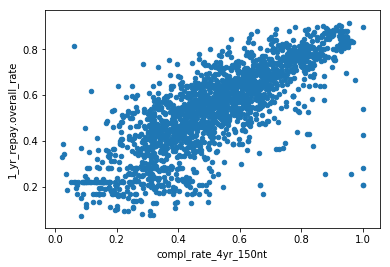

In [73]:
cleaned.plot(kind='scatter', x='compl_rate_4yr_150nt', y='1_yr_repay.overall_rate')


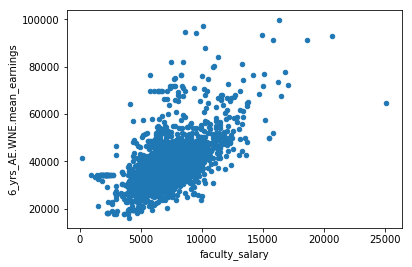

In [74]:
cleaned.plot(kind='scatter', x='faculty_salary', y='6_yrs_AE.WNE.mean_earnings')


(array([ 35., 111., 168., 285., 348., 316., 268., 165., 110.,  59.]),
 array([0.0235 , 0.12115, 0.2188 , 0.31645, 0.4141 , 0.51175, 0.6094 ,
        0.70705, 0.8047 , 0.90235, 1.     ]),
 <a list of 10 Patch objects>)

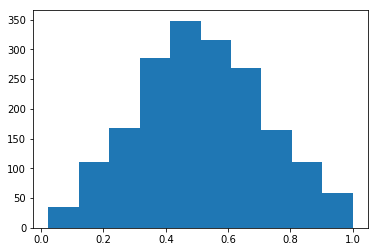

In [99]:
plt.hist(cleaned['compl_rate_4yr_150nt'].dropna())

In [103]:
cleaned[['name','tuition.in_state']].sort_values(
    by="tuition.in_state").head(10)

,name,tuition.in_state
1617,University of Puerto Rico-Mayaguez,2019.0
1618,University of Puerto Rico-Rio Piedras,2019.0
1607,Puerto Rico Conservatory of Music,3370.0
1822,Middle Georgia State University,3474.0
1851,University of Florida-Online,3876.0
321,Brigham Young University-Idaho,3950.0
472,Fort Hays State University,4469.0
1708,Nevada State College,4482.0
1002,Elizabeth City State University,4498.0
868,New Mexico Highlands University,4500.0


In [102]:
cleaned[['name','tuition.in_state']].sort_values(
    by="tuition.in_state",ascending=False).head(10)

,name,tuition.in_state
886,Columbia University in the City of New York,51008.0
952,Sarah Lawrence College,50780.0
986,Vassar College,49570.0
330,University of Chicago,49380.0
200,Trinity College,49056.0
1178,Carnegie Mellon University,49022.0
213,George Washington University,48760.0
1092,Oberlin College,48682.0
642,Tufts University,48643.0
584,Amherst College,48526.0


In [105]:
cleaned[['name','6_yrs_AE.WNE.mean_earnings']].sort_values(
    by="6_yrs_AE.WNE.mean_earnings",ascending=False).head(10)

,name,6_yrs_AE.WNE.mean_earnings
618,Massachusetts Institute of Technology,99600.0
140,Samuel Merritt University,97200.0
876,Albany College of Pharmacy and Health Sciences,94500.0
1149,Oregon Health & Science University,94100.0
1000,Duke University,93200.0
1625,Stanford University,92800.0
609,Harvard University,91300.0
1244,University of Pennsylvania,91200.0
1308,Medical University of South Carolina,87800.0
1178,Carnegie Mellon University,84000.0
